# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Mirza Alayda Umayroh
- **Email:** mirzaumayroh@gmail.com
- **ID Dicoding:** mirzaaumayroh

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan berdasarkan kategori produk 3 teratas selama periode tertentu?
- Bagaimana tingkat kepuasan pelanggan berdasarkan ulasan? Apakah ada korelasi antara kepuasan dan kategori produk tertentu?
- Bagaimana distribusi geografis pelanggan, dan apakah ada perbedaan perilaku pembelian berdasarkan wilayah?

<!-- optional
- Berapa lama rata-rata waktu pengiriman pesanan, dan apakah ini bervariasi berdasarkan lokasi geografis?
- Apa produk yang paling sering banyak dibeli dan paling sedikit ? -->

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import geopandas as gpd
# import contextily as cx
# from geodatasets import get_path

## Data Wrangling

### Gathering Data

In [2]:
costumer_data = pd.read_csv("E-Commerce Public Dataset/customers_dataset.csv")
costumer_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- Tabel ini merupakan data meneganai costumer
- Terdiri dari 5 feature yaitu costumer_id,costumer_unique_id,costumer_zip_code_prefix,costumer_city_costumer_state

In [3]:
geolocation_data = pd.read_csv("E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- Tabel ini merupakan data mengenai geologi dari lokasi para costumer dalam dataset E-Commerce Public Dataset
- Terdiri dari 5 features yaitu, geolocation_zip_code_prefix, geolocation_lat, geolocation_Ing, geolocation_city, dan geolocation_state

In [4]:
orderItems_df = pd.read_csv("E-Commerce Public Dataset/order_items_dataset.csv")
orderItems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight:**
- Tabel ini merupakan tabel data berisi informasi mengenai order items 
- terdiri dari 6 colums yaitu, order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value

In [5]:
orderPayments_df = pd.read_csv("E-Commerce Public Dataset/order_payments_dataset.csv")
orderPayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Tabel ini merupakan tabel data berisi informasi mengenai order payment
- terdiri dari 5 colums yaitu, order_id, payment_sequential, payment_type, payment_installments, payment_value

In [6]:
orderReviews_df = pd.read_csv("E-Commerce Public Dataset/order_reviews_dataset.csv")
orderReviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight:**
- Tabel ini merupakan tabel data berisi informasi mengenai order reviews
- terdiri dari 6 colums yaitu,  review_id, order_id, review_score, review_comment_title, review_comment_message,review_creation_date, review_answer_timestamp

In [7]:
order_df = pd.read_csv("E-Commerce Public Dataset/orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- Tebel ini merupakan tabel data berisi informasi mengenai order/pemesanan costumer
- terdiri dari 8 colums yaitu, order_id, customer_id, order_status,	order_purchase_timestamp, order_approved_at	order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date

In [8]:
productCategoryName_df = pd.read_csv("E-Commerce Public Dataset/product_category_name_translation.csv")
productCategoryName_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Tabel ini merupakan tabel data berisi informasi mengenai terjemahan dari nama kategori sebuah product kedalam bahasa inggris
- Terdiri dari 2 colums yaitu, product_category_name, product_category_name_english

In [9]:
product_df = pd.read_csv("E-Commerce Public Dataset/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- Tabel ini merupakan tabel data berisi informasi mengenani produk yang terdapat di e-commerce
- yang terdiri dari 10 colums

In [10]:
seller_df = pd.read_csv("E-Commerce Public Dataset/sellers_dataset.csv")
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Tabel ini merupakan tabel data berisi informasi mengenai seller yang ada pada e-commerce
- terdiri dari 4 colums/features.

### Assessing Data

#### Assessing Data pada Tabel Costumer

In [11]:
# Melihat data info
costumer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
#mengecek nilai null
costumer_data.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
# melakukan pengecekan jumlah duplikasi
# melakukan describe data tabel
print("Jumlah duplikasi: ", costumer_data.duplicated().sum())
costumer_data.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- tidak ada nilai null dalam data
- tidak ada data duplikasi dalam data
- dan tidak ada keanehan atau ketidaksesuaian data 

#### Assessing Data pada Tabel Geolocation

In [14]:
# info data
geolocation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
#mengecek nilai null
geolocation_data.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [16]:
# melakukan pengecekan jumlah duplikasi
# melakukan describe data tabel
print("Jumlah duplikasi: ", geolocation_data.duplicated().sum())
geolocation_data.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
- tidak ada nilai null dalam data
- ada data duplikasi dalam data aebanyak 261832
- dan tidak ada keanehan atau ketidaksesuaian data 

#### Assessing Data pada Tabel Order Items

In [17]:
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
# Mengecek nilai null
orderItems_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [19]:
print("Jumlah duplikasi: ", orderItems_df.duplicated().sum())
orderItems_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Terdapat tipe data yang salah pada shipping_limit_date
- tidak ada nilai null dalam data
- tidak ada data duplikasi dalam data
- dan tidak ada keanehan atau ketidaksesuaian data 

#### Assessing Data pada Tabel Order Payments

In [20]:
orderPayments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [21]:
#Mengecek nilai null
orderPayments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [22]:
# melakukan pengecekan jumlah duplikasi
# melakukan describe data tabel
print("Jumlah duplikasi: ", orderPayments_df.duplicated().sum())
orderPayments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- tidak ada nilai null dalam data
- tidak ada data duplikasi dalam data
- dan tidak ada keanehan atau ketidaksesuaian data 

#### Assessing Data pada Tabel Order Reviews

In [23]:
orderReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [24]:
orderReviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [25]:
# melakukan pengecekan jumlah duplikasi
# melakukan describe data tabel
print("Jumlah duplikasi: ", orderReviews_df.duplicated().sum())
orderReviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- ada nilai null dalam data pada review tittle dan message
- ada tipe data yang tidak sesuai pada  review_answer_timestamp dan  review_creation_date
- tidak ada data duplikasi dalam data
- dan tidak ada keanehan atau ketidaksesuaian data 

#### Assessing Data pada Tabel Orders

In [26]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [27]:
order_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [28]:
# melakukan pengecekan jumlah duplikasi
# melakukan describe data tabel
print("Jumlah duplikasi: ", order_df.duplicated().sum())
order_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- ada nilai null dalam data
- ada tipe data yang tidak sesuai untuk data timestamp
- tidak ada data duplikasi dalam data
- dan tidak ada keanehan atau ketidaksesuaian data 

#### Assessing Data pada Tabel Product Category Name

In [29]:
productCategoryName_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [30]:
productCategoryName_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [31]:
# melakukan pengecekan jumlah duplikasi
# melakukan describe data tabel
print("Jumlah duplikasi: ", productCategoryName_df.duplicated().sum())
productCategoryName_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- tidak ada nilai null dalam data
- tidak ada data duplikasi dalam data
- dan tidak ada keanehan atau ketidaksesuaian data 

#### Assessing Data pada Tabel Produk

In [32]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [33]:
product_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [34]:
# melakukan pengecekan jumlah duplikasi
# melakukan describe data tabel
print("Jumlah duplikasi: ", product_df.duplicated().sum())
product_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- ada nilai null dalam data
- tidak ada data duplikasi dalam data
- dan tidak ada keanehan atau ketidaksesuaian data 

##### **Assessing Data pada Tabel Seller**

In [35]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [36]:
seller_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [37]:
# melakukan pengecekan jumlah duplikasi
# melakukan describe data tabel
print("Jumlah duplikasi: ", seller_df.duplicated().sum())
seller_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- tidak ada nilai null dalam data
- tidak ada data duplikasi dalam data
- dan tidak ada keanehan atau ketidaksesuaian data 

#### **Insight Keseluruhan Dari Assesing Data:**
- Pada data tabel geolocation terdapat data duplikasi sebanyak 261832
- Pada data tabel data order items terdapat feature yang tipe datanya tidak sesuai shipping_limit_date
- Pada data tabel order reviews terdapat tiped data yang tidak sesuai pada  review_creation_date,  review_answer_timestamp dan terdapat nilai null pada :
    1. review_comment_title       87656
    2. review_comment_message     58247
- Pada data tabel orders terdapat tipe data yang tidak sesuai dan nilai null pada :
    1. order_approved_at                 160
    2. order_delivered_carrier_date     1783
    3. order_delivered_customer_date    2965
- Pada data tabel produk terdapat nilai null pada : 
    1. product_category_name         610
    2. product_name_lenght           610
    3. product_description_lenght    610
    4. product_photos_qty            610

### Cleaning Data

#### Cleaning Data Tabel geolocation

In [38]:
# Mengatasi duplikasi 
geolocation_data.duplicated().sum()

261831

In [39]:
geolocation_data.drop_duplicates(inplace=True)

In [40]:
#Cek lagi
geolocation_data.duplicated().sum()

0

#### Cleaning Data Tabel Order Items

In [41]:
# mengubah ke tipe data time pada shipping_limit_date
orderItems_df['shipping_limit_date'] = pd.to_datetime(orderItems_df['shipping_limit_date'])

In [42]:
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Cleaning Data Tabel Order Reviews

##### Menangani Missing Value pada Reviews Tittle

In [43]:
orderReviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [44]:
orderReviews_df[orderReviews_df['review_comment_title'].notna()]['review_comment_title']

9                        recomendo
15                 Super recomendo
19         Não chegou meu produto 
22                           Ótimo
34                      Muito bom.
                   ...            
99192                            👍
99196           muito bom produto 
99197    Não foi entregue o pedido
99199              OTIMA EMBALAGEM
99200               Foto enganosa 
Name: review_comment_title, Length: 11568, dtype: object

In [45]:
# Drop colum review comment tittle 
# karena nilai nan besar dan tidak mempengarhui apapun jika di drop

orderReviews_df = orderReviews_df.drop('review_comment_title', axis=1)


In [46]:
orderReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_message   40977 non-null  object
 4   review_creation_date     99224 non-null  object
 5   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.5+ MB


##### Menangani Missing Value Pada Review Comment Message

In [47]:
orderReviews_df.review_comment_message.value_counts()

review_comment_message
Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                            

In [48]:
# Mengisi dengan komentar "sem comentários" atau dalam bahasa inggris "No Comment"
orderReviews_df['review_comment_message'] = orderReviews_df['review_comment_message'].fillna('sem comentários')


In [49]:
orderReviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [50]:
orderReviews_df.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,sem comentários,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,sem comentários,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,sem comentários,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


##### Menangani Tipe data Time Series

In [51]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  orderReviews_df[column] = pd.to_datetime(orderReviews_df[column])

In [52]:
orderReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_message   99224 non-null  object        
 4   review_creation_date     99224 non-null  datetime64[ns]
 5   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 4.5+ MB


#### Cleaning Data Tabel Orders

In [53]:
order_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [54]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


##### Menangani Tipe Data Time Series 

In [55]:
kolom_timestamp = [
    'order_purchase_timestamp', 'order_approved_at', 
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for kolom in kolom_timestamp:
    order_df[kolom] = pd.to_datetime(order_df[kolom])

In [56]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##### Menangani Missing Value

In [57]:
# Missing Value pada order_approved_at
# Menggunakan order_purchase_timestamp mengasumsikan bahwa jika waktu persetujuan hilang, pesanan disetujui pada saat pembelian.

order_df['order_approved_at'] = order_df['order_approved_at'].fillna(order_df['order_purchase_timestamp'])


In [58]:
order_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [59]:
# Missing Value pada order_delivered_carrier_date 
# Menggunakan median dengan menghitung titik tengah antara waktu pembelian dan perkiraan waktu pengiriman. 
# mengasumsikan bahwa kurir menerima paket kira-kira di tengah-tengah proses pengiriman.

order_df['order_delivered_carrier_date'] = order_df.apply(
    lambda row: row['order_delivered_carrier_date'] if pd.notna(row['order_delivered_carrier_date']) 
    else row['order_purchase_timestamp'] + (row['order_estimated_delivery_date'] - row['order_purchase_timestamp']) / 2,
    axis=1
)

In [60]:
order_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [61]:
# Missing Value pada order_delivered_customer_date
# menggunakan order_estimated_delivery_date jika tanggal pengiriman sebenarnya hilang. 
# mengasumsikan bahwa pesanan dikirim pada tanggal yang diperkirakan jika kita tidak memiliki informasi tentang pengiriman sebenarnya.

order_df['order_delivered_customer_date'] = order_df['order_delivered_customer_date'].fillna(order_df['order_estimated_delivery_date'])

In [62]:
order_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Cleaning Data Tabel Produk

In [63]:
product_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [64]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [65]:
print(product_df.isnull().corr())

                            product_id  product_category_name  \
product_id                         NaN                    NaN   
product_category_name              NaN                1.00000   
product_name_lenght                NaN                1.00000   
product_description_lenght         NaN                1.00000   
product_photos_qty                 NaN                1.00000   
product_weight_g                   NaN                0.02783   
product_length_cm                  NaN                0.02783   
product_height_cm                  NaN                0.02783   
product_width_cm                   NaN                0.02783   

                            product_name_lenght  product_description_lenght  \
product_id                                  NaN                         NaN   
product_category_name                   1.00000                     1.00000   
product_name_lenght                     1.00000                     1.00000   
product_description_lenght       

In [66]:
# Membuat kategori untuk produk tidak lengkap
# Untuk product_category_name
product_df = product_df.assign(product_category_name=product_df['product_category_name'].fillna('Incomplete_Data'))


In [67]:
# Untuk kolom numerik
# Menggunakan Nilai median
numeric_columns = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
for col in numeric_columns:
    median_value = product_df[col].median()
    product_df[col] = product_df[col].fillna(median_value)


In [68]:
# Mengisi missing value untuk dimensi dan berat produk
# Menggunakan median karena jumlah missing value-nya sangat kecil.
dimension_columns = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in dimension_columns:
    product_df[col] = product_df[col].fillna(product_df[col].median())

In [69]:
# Verifikasi hasil
print(product_df.isnull().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


## Exploratory Data Analysis (EDA)

### Explore costumer_data

In [70]:
costumer_data.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [71]:
costumer_data.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [72]:
costumer_data.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**Insight:**
- Pelanggan terbanyak berada di kota sao paulo dengan jumlah 15540, dan terdapat beberapa kota lainnya yang masuk dalam
top 5 jumlah costumer berdasarkan kota. 
    1. sao paulo         15540
    2. rio de janeiro     6882
    3. belo horizonte     2773
    4. brasilia           2131
    5. curitiba           1521
- Negara bagian SP paling banyak pelanggan dan Paling sedikit berada di negara bagian RR
- Perbedaan jumlah pelanggan di tiap bagian negara cukup signifikan atau tidak merata. 

### Explore geolocation_data

In [73]:
geolocation_data.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


### Explore orderItems_df

In [74]:
orderItems_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [75]:
print("Shipping Limit Date Terakhir atau Terlama berada di tanggal",orderItems_df["shipping_limit_date"].max())

Shipping Limit Date Terakhir atau Terlama berada di tanggal 2020-04-09 22:35:08


**Insight**
- Shipping Limit Date order items terdekat jatuh pada tanggal 2018-01-07 15:36:52
- Shipping Limit Date order items terlama jatuh pada tanggal 2020-04-08 22:35:08
- rata-rata shipping limit date untu orders item berada di sekiatran tanggal 2018-01-26 13:59:35
- Rentan harga untuk order items sendiri dari 120,6 - 6735 dollar
- Dengan rentan harga pasar 19.9 - 409.9 dollar

### Ekplore orders_df

In [76]:
order_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:07:21.164720896,2018-01-03 18:13:04.035407616,2018-01-13 06:50:40.982220800,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-09-21 19:42:09.500000,2016-09-30 00:00:00,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-14 21:14:49,2017-09-22 21:28:06,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-01-23 18:43:01,2018-02-01 19:34:49,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-08 10:17:00,2018-05-15 17:51:03,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-29 22:08:01,2018-11-12 00:00:00,2018-11-12 00:00:00


In [77]:
delivery_time = order_df["order_delivered_customer_date"] - order_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_df["delivery_time"] = round(delivery_time/86400)

In [78]:
order_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:07:21.164720896,2018-01-03 18:13:04.035407616,2018-01-13 06:50:40.982220800,2018-01-24 03:08:37.730111232,12.878953
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-09-21 19:42:09.500000,2016-09-30 00:00:00,2016-09-30 00:00:00,1.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-14 21:14:49,2017-09-22 21:28:06,2017-10-03 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-01-23 18:43:01,2018-02-01 19:34:49,2018-02-15 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-08 10:17:00,2018-05-15 17:51:03,2018-05-25 00:00:00,16.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-29 22:08:01,2018-11-12 00:00:00,2018-11-12 00:00:00,210.000000


**Insight**
- Berdasarkan tabel diatas diapatkan bahwa rata rata waktu dari pemesanan hingga barang sampai memakan waktu sebanyak 12 hari
- dan minimum 1 hari hinggga maksimal barang sampai 21 hari dari waktu pemesanan awal.

### Ekplore orders, order_items, products, dan product_category_name_translation.

In [79]:
# Menggabungkan tabel yang diperlukan
sales_df = pd.merge(order_df, orderItems_df, on='order_id')
sales_df = pd.merge(sales_df, product_df, on='product_id')
sales_df = pd.merge(sales_df, productCategoryName_df, on='product_category_name')


In [80]:
sales_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,1,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,1,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,1,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,1,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


In [81]:
sales_trend = sales_df.groupby([pd.Grouper(key='order_purchase_timestamp', freq='ME'), 'product_category_name_english'])['price'].sum().reset_index()

In [82]:
# Melihat beberapa baris pertama
print(sales_trend.head())

  order_purchase_timestamp product_category_name_english    price
0               2016-09-30               furniture_decor    72.89
1               2016-09-30                 health_beauty   134.97
2               2016-09-30                     telephony    59.50
3               2016-10-31              air_conditioning  1707.09
4               2016-10-31                         audio   156.99


In [83]:
# Statistik deskriptif
print(sales_trend.describe())


            order_purchase_timestamp          price
count                           1253    1253.000000
mean   2017-11-16 17:37:18.148443648   10699.596121
min              2016-09-30 00:00:00       3.900000
25%              2017-06-30 00:00:00     508.850000
50%              2017-11-30 00:00:00    2522.380000
75%              2018-04-30 00:00:00   11948.220000
max              2018-09-30 00:00:00  123872.660000
std                              NaN   18226.428524


In [84]:
# Kategori dengan penjualan tertinggi
top_categories = sales_trend.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).head(10)
print("Top 10 kategori dengan penjualan tertinggi:")
print(top_categories)

Top 10 kategori dengan penjualan tertinggi:
product_category_name_english
health_beauty            1258681.34
watches_gifts            1205005.68
bed_bath_table           1036988.68
sports_leisure            988048.97
computers_accessories     911954.32
furniture_decor           729762.49
cool_stuff                635290.85
housewares                632248.66
auto                      592720.11
garden_tools              485256.46
Name: price, dtype: float64


In [85]:
# Kategori dengan penjualan terendah
top_categories = sales_trend.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).tail(10)
print("Top 10 kategori dengan penjualan terendah:")
print(top_categories)

Top 10 kategori dengan penjualan terendah:
product_category_name_english
fashio_female_clothing       2803.64
fashion_sport                2119.51
la_cuisine                   2054.99
arts_and_craftmanship        1814.01
diapers_and_hygiene          1567.59
flowers                      1110.04
home_comfort_2                760.27
cds_dvds_musicals             730.00
fashion_childrens_clothes     569.85
security_and_services         283.29
Name: price, dtype: float64


**Insight**
- Kategori dengan penjulan tertinggi pertama yaitu Health_beauty dengan nilai total penjualan sebesar 1258681.34
- dan Kategori dengan penjualan terrendah yaitu kategori security_and_services dengan total penjualan sebesar  283.29 

### Ekplore tabel order_reviews, orders, order_items, products, dan product_category_name_translation.

In [86]:
# Menggabungkan tabel yang diperlukan
reviews_df = pd.merge(orderReviews_df, order_df, on='order_id')
reviews_df = pd.merge(reviews_df, orderItems_df, on='order_id')
reviews_df = pd.merge(reviews_df, product_df, on='product_id')
reviews_df = pd.merge(reviews_df, productCategoryName_df, on='product_category_name')


In [87]:
# Menghitung rata-rata peringkat per kategori
avg_ratings = reviews_df.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False)

In [88]:
print("Rata-rata peringkat ulasan per kategori produk:")
print(avg_ratings)

Rata-rata peringkat ulasan per kategori produk:
product_category_name_english
cds_dvds_musicals            4.642857
fashion_childrens_clothes    4.500000
books_general_interest       4.446266
costruction_tools_tools      4.444444
flowers                      4.419355
                               ...   
fashion_male_clothing        3.641221
home_comfort_2               3.629630
office_furniture             3.493183
diapers_and_hygiene          3.256410
security_and_services        2.500000
Name: review_score, Length: 71, dtype: float64


In [89]:
# Menghitung distribusi peringkat
rating_distribution = reviews_df['review_score'].value_counts().sort_index()
print("\nDistribusi peringkat ulasan:")
print(rating_distribution)


Distribusi peringkat ulasan:
review_score
1    13939
2     3809
3     9319
4    21009
5    62674
Name: count, dtype: int64


### Ekplore tabel orders, customers, orderItems, produtcategoryname

In [90]:
# Menggabungkan tabel yang diperlukan
customer_orders = pd.merge(costumer_data, order_df, on='customer_id')
customer_orders = pd.merge(customer_orders, orderItems_df, on='order_id')
customer_orders = pd.merge(customer_orders, product_df, on='product_id')
customer_orders = pd.merge(customer_orders, productCategoryName_df, on='product_category_name')

In [91]:
# Distribusi pelanggan per negara bagian
customer_distribution = customer_orders['customer_state'].value_counts()

In [92]:
print("Distribusi pelanggan per negara bagian:")
print(customer_distribution)

Distribusi pelanggan per negara bagian:
customer_state
SP    46782
RJ    14352
MG    12945
RS     6134
PR     5661
SC     4113
BA     3738
DF     2373
GO     2279
ES     2238
PE     1782
CE     1460
PA     1060
MT     1043
MA      813
MS      810
PB      592
PI      535
RN      523
AL      440
SE      383
TO      310
RO      272
AM      163
AC       90
AP       82
RR       50
Name: count, dtype: int64


In [93]:
# Analisis kategori produk favorit per negara bagian
state_category_sales = customer_orders.groupby(['customer_state', 'product_category_name_english'])['order_id'].count().reset_index()
top_category_per_state = state_category_sales.loc[state_category_sales.groupby('customer_state')['order_id'].idxmax()]

In [94]:
print("\nKategori produk favorit per negara bagian:")
print(top_category_per_state)


Kategori produk favorit per negara bagian:
     customer_state product_category_name_english  order_id
12               AC               furniture_decor        12
50               AL                 health_beauty        63
88               AM                 health_beauty        20
118              AP                 health_beauty        10
165              BA                 health_beauty       350
219              CE                 health_beauty       167
276              DF                 health_beauty       246
307              ES                bed_bath_table       225
365              GO                bed_bath_table       235
449              MA                 health_beauty        89
475              MG                bed_bath_table      1331
584              MS                sports_leisure        75
621              MT                 health_beauty        90
675              PA                 health_beauty       107
720              PB                 health_beauty       

In [95]:
# Rata-rata nilai pesanan per negara bagian
avg_order_value = customer_orders.groupby('customer_state')['price'].mean().sort_values(ascending=False)

In [96]:
print("\nRata-rata nilai pesanan per negara bagian:")
print(avg_order_value)


Rata-rata nilai pesanan per negara bagian:
customer_state
PB    189.994493
AL    181.226886
AC    176.845000
RO    167.503603
AP    164.320732
PI    161.383009
PA    159.235708
TO    158.418548
RN    157.660497
SE    153.386684
CE    153.224685
RR    151.669000
MT    149.003960
MA    145.199631
PE    145.073182
MS    143.428000
BA    135.104746
AM    133.834601
DF    126.381007
GO    125.448517
RJ    125.407482
SC    124.796934
ES    122.172940
MG    120.958655
RS    120.757356
PR    119.163846
SP    109.747705
Name: price, dtype: float64


### Ekplore All data

In [97]:
# Menggabungkan tabel yang diperlukan
orders_items_merged = pd.merge(order_df, orderItems_df, on='order_id', how='left')
orders_items_payment_merged = pd.merge(orders_items_merged, orderPayments_df, on='order_id', how='left')
orders_full_merged = pd.merge(orders_items_payment_merged, orderReviews_df, on='order_id', how='left')
orders_customer_merged = pd.merge(orders_full_merged, costumer_data, on='customer_id', how='left')
orders_products_merged = pd.merge(orders_customer_merged,product_df, on='product_id', how='left')
final_merged = pd.merge(orders_products_merged, productCategoryName_df, on='product_category_name', how='left')# Gabungkan dengan seller_df
final_merged = pd.merge(final_merged, seller_df, on='seller_id', how='left')

In [98]:
final_merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1.0,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1.0,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1.0,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,1.0,...,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,1.0,...,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840.0,guariba,SP


In [99]:
final_merged.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              119143 non-null  datetime64[ns]
 5   order_delivered_carrier_date   119143 non-null  datetime64[ns]
 6   order_delivered_customer_date  119143 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   delivery_time                  119143 non-null  float64       
 9   order_item_id                  118310 non-null  float64       
 10  product_id                     118310 non-null  object        
 11  

In [100]:

final_merged.groupby(by=["customer_city", "product_category_name"]).agg({
    "price": "sum"
})

price
customer_city       product_category_name         
abadia dos dourados cool_stuff              199.00
                    esporte_lazer           120.00
                    livros_interesse_geral   39.90
abadiania           eletroportateis         949.99
abaete              Incomplete_Data          36.90
...                                            ...
ze doca             esporte_lazer           149.90
                    ferramentas_jardim       39.90
                    instrumentos_musicais   359.00
zortea              Incomplete_Data          29.90
                    informatica_acessorios   69.90

[25723 rows x 1 columns]

In [101]:

final_merged.groupby(by=["customer_state", "product_category_name"]).agg({
    "price": "sum"
})

price
customer_state product_category_name               
AC             Incomplete_Data                66.90
               artigos_de_natal               69.90
               automotivo                    606.97
               bebes                         697.84
               beleza_saude                 1386.58
...                                             ...
TO             portateis_casa_forno_e_cafe  1999.00
               relogios_presentes           5446.89
               telefonia                    1268.12
               telefonia_fixa               1390.99
               utilidades_domesticas        1349.55

[1394 rows x 1 columns]

In [102]:
final_merged.groupby(by=["review_score", "product_category_name"]).agg({
    "price": "sum"
})

price
review_score product_category_name               
1.0          Incomplete_Data             29530.09
             agro_industria_e_comercio   17352.65
             alimentos                    2592.65
             alimentos_bebidas             624.72
             artes                        2548.50
...                                           ...
5.0          sinalizacao_e_seguranca     10064.74
             tablets_impressao_imagem     3864.76
             telefonia                  163652.03
             telefonia_fixa              16686.74
             utilidades_domesticas      386816.05

[353 rows x 1 columns]

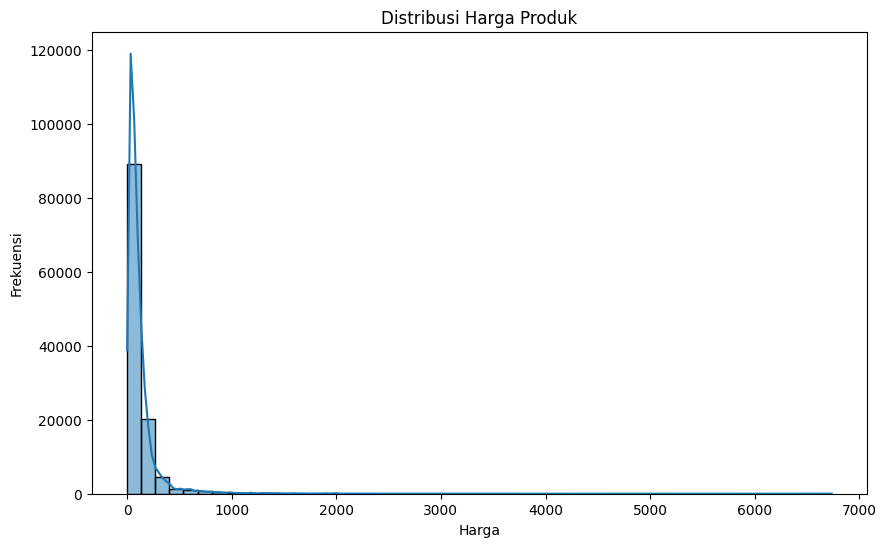

In [103]:
plt.figure(figsize=(10,6))
sns.histplot(final_merged['price'], bins=50, kde=True)
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penjualan berdasarkan kategori produk 3 Teratas selama periode tertentu?

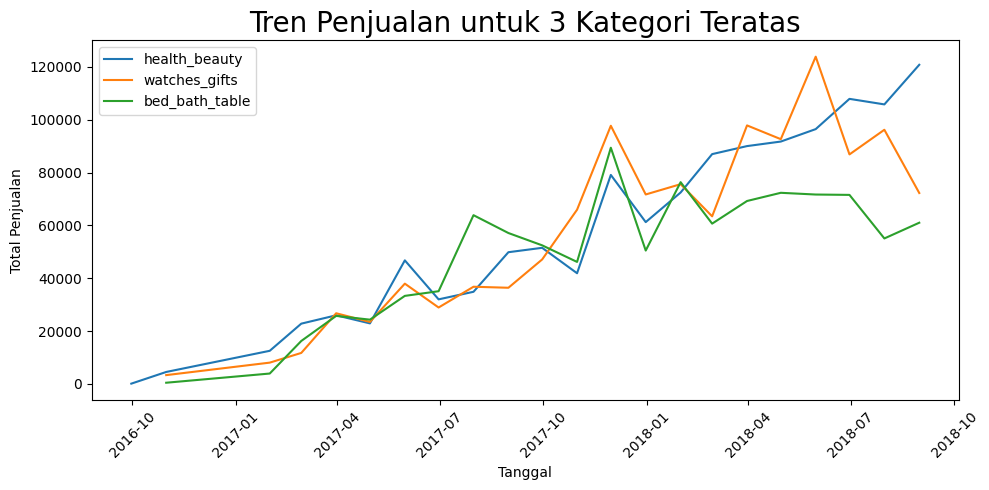

In [104]:
def plot_sales_trend(sales_trend):
    plt.figure(figsize=(10, 5))
    top_categories = sales_trend.groupby('product_category_name_english')['price'].sum().nlargest(3).index
    for category in top_categories:
        data = sales_trend[sales_trend['product_category_name_english'] == category]
        plt.plot(data['order_purchase_timestamp'], data['price'], label=category)
    
    plt.title('Tren Penjualan untuk 3 Kategori Teratas', loc="center", fontsize=20)
    plt.xlabel('Tanggal')
    plt.ylabel('Total Penjualan')
    plt.legend()
    plt.xticks(fontsize=10) 
    plt.yticks(fontsize=10) 
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_sales_trend(sales_trend)

### Pertanyaan 2: Bagaimana tingkat kepuasan pelanggan berdasarkan ulasan? Apakah ada korelasi antara kepuasan dan kategori produk tertentu?

C:\Users\mirza\AppData\Local\Temp\ipykernel_1180\3320482434.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_3_categories.index, y=top_3_categories.values, ax=ax1, palette=colors)
C:\Users\mirza\AppData\Local\Temp\ipykernel_1180\3320482434.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha='center', fontsize=10)
C:\Users\mirza\AppData\Local\Temp\ipykernel_1180\3320482434.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_score', data=reviews_df, ax=ax2, palette=review_colors)
C:\Users\mirza\AppData\Local\Temp\ipykernel_1180\33204

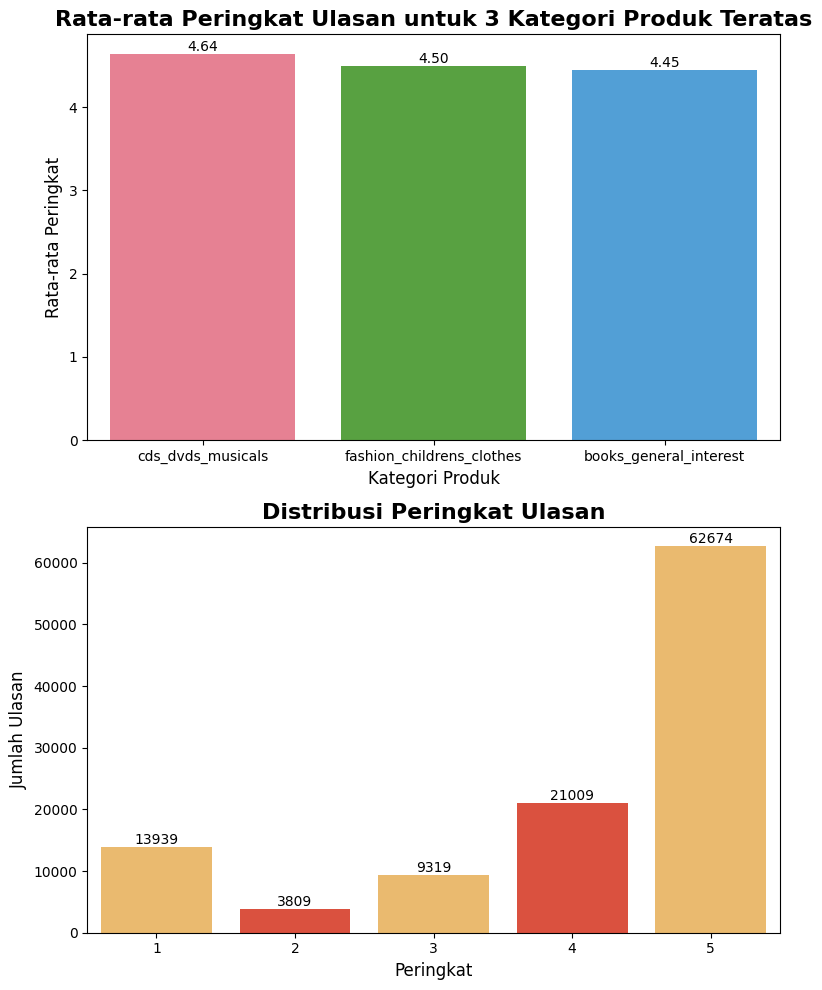

In [105]:
def plot_customer_satisfaction(avg_ratings, reviews_df):
    # Urutkan rata-rata peringkat dan ambil 3 teratas
    top_3_categories = avg_ratings.sort_values(ascending=False).head(3)

    # Set up color palette
    colors = sns.color_palette("husl", 3)
    review_colors = sns.color_palette("YlOrRd", 2)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
    
    # Plot rata-rata peringkat untuk 3 kategori teratas
    bars = sns.barplot(x=top_3_categories.index, y=top_3_categories.values, ax=ax1, palette=colors)
    ax1.set_title('Rata-rata Peringkat Ulasan untuk 3 Kategori Produk Teratas', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Kategori Produk', fontsize=12)
    ax1.set_ylabel('Rata-rata Peringkat', fontsize=12)
    ax1.set_xticklabels(ax1.get_xticklabels(), ha='center', fontsize=10)
    ax1.tick_params(axis='y', labelsize=10)

    # Tambahkan label nilai di atas setiap bar
    for i, bar in enumerate(bars.patches):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
                 f'{top_3_categories.values[i]:.2f}', 
                 ha='center', va='bottom', fontsize=10)

    # Plot distribusi peringkat
    sns.countplot(x='review_score', data=reviews_df, ax=ax2, palette=review_colors)
    ax2.set_title('Distribusi Peringkat Ulasan', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Peringkat', fontsize=12)
    ax2.set_ylabel('Jumlah Ulasan', fontsize=12)
    ax2.tick_params(axis='both', labelsize=10)

    # Tambahkan label jumlah di atas setiap bar
    for i, bar in enumerate(ax2.patches):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
                 f'{int(bar.get_height())}', 
                 ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

# Gunakan fungsi yang telah dimodifikasi
plot_customer_satisfaction(avg_ratings, reviews_df)

### Pertanyaan 3:Bagaimana distribusi geografis pelanggan, dan apakah ada perbedaan perilaku pembelian berdasarkan wilayah?


C:\Users\mirza\AppData\Local\Temp\ipykernel_1180\2443593016.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels())
C:\Users\mirza\AppData\Local\Temp\ipykernel_1180\2443593016.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


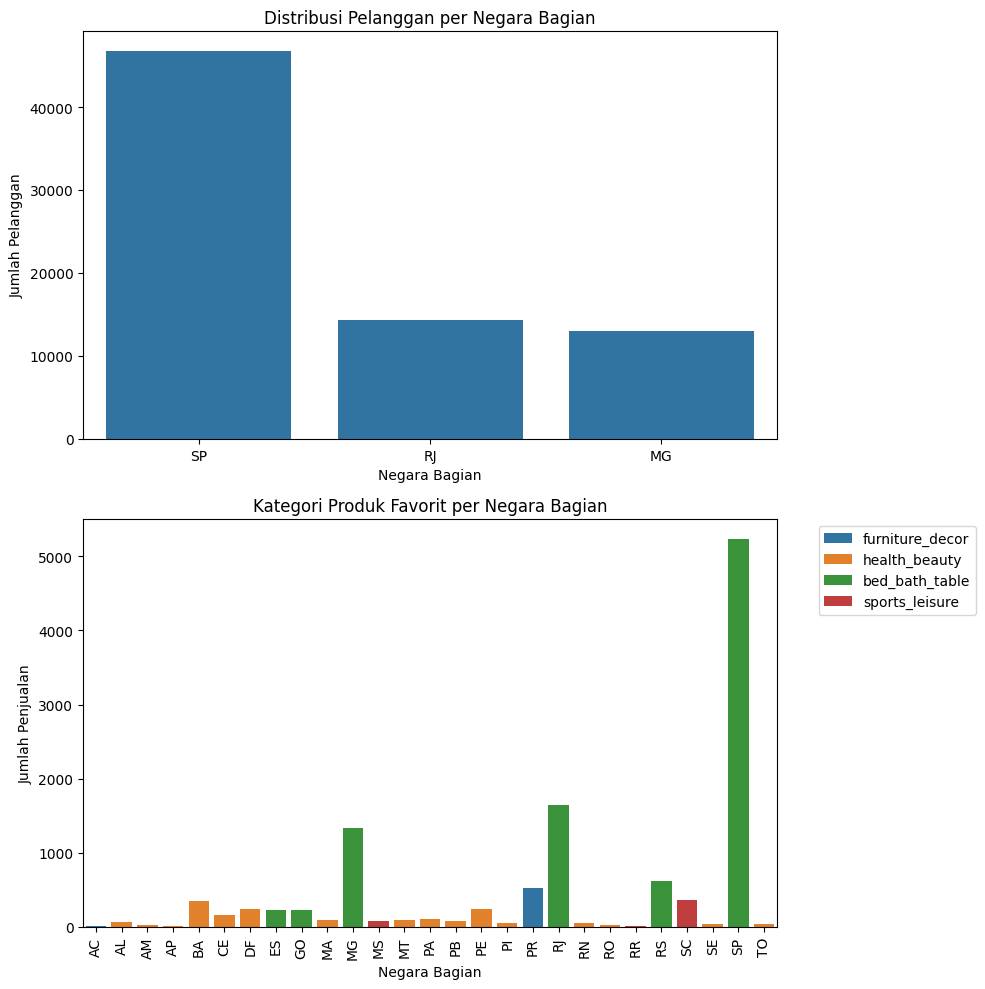

In [106]:
def plot_customer_distribution(customer_distribution, top_category_per_state): 
    # Urutkan rata-rata peringkat dan ambil 3 teratas
    top_3_costumers= customer_distribution.sort_values(ascending=False).head(3)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10)) 
    
    # Plot distribusi pelanggan per negara bagian 
    sns.barplot(x=top_3_costumers.index, y=top_3_costumers.values, ax=ax1)
    ax1.set_title('Distribusi Pelanggan per Negara Bagian') 
    ax1.set_xlabel('Negara Bagian') 
    ax1.set_ylabel('Jumlah Pelanggan') 
    ax1.set_xticklabels(ax1.get_xticklabels()) 

    # Plot kategori produk favorit per negara bagian 
    sns.barplot(x='customer_state', y='order_id', hue='product_category_name_english', data=top_category_per_state, ax=ax2) 
    ax2.set_title('Kategori Produk Favorit per Negara Bagian') 
    ax2.set_xlabel('Negara Bagian') 
    ax2.set_ylabel('Jumlah Penjualan') 
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90) 
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
    
    plt.tight_layout() 
    plt.show() 
plot_customer_distribution(customer_distribution, top_category_per_state)

**Insight:**
- Pada proses ini terdapat ma2 cam visulaisasi yang digunakan yaitu line chart dan juga bar chart

## Analisis Lanjutan (Opsional)

### RFM Analysis

In [107]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   delivery_time                  99441 non-null  float64       
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 6.8+ MB


In [108]:
rfm_df = final_merged.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,93.00


In [109]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   delivery_time                  99441 non-null  float64       
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 6.8+ MB


In [110]:
# Ubah kolom menjadi tipe datetime
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"])
order_df["order_delivered_customer_date"] = pd.to_datetime(order_df["order_delivered_customer_date"])

# Mengambil tanggal dari datetime
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = order_df["order_delivered_customer_date"].dt.date.max()

# Menghitung recency (selisih hari dari transaksi terakhir)
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

# Lihat hasilnya
rfm_df.head()


,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,89.80,363
1,000161a058600d5901f007fab4c27140,2017-07-16,1,54.90,484
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,179.99,622
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,149.90,453
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,93.00,224


In [111]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,363
1,000161a058600d5901f007fab4c27140,1,54.90,484
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,622
3,0002414f95344307404f0ace7a26f1d5,1,149.90,453
4,000379cdec625522490c315e70c7a9fb,1,93.00,224


In [112]:

rfm_df.describe()

,frequency,monetary,recency
count,99441.0,99441.000000,99441.000000
mean,1.0,143.539382,316.272956
std,0.0,241.433332,153.670615
min,1.0,0.000000,26.000000
25%,1.0,45.950000,192.000000
50%,1.0,89.000000,298.000000
75%,1.0,153.800000,426.000000
max,1.0,13440.000000,799.000000


In [113]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
63970,a4b417188addbc05b26b72d5e44837a1,1,0.0,26
51713,856336203359aa6a61bf3826f7d84c49,1,0.0,27
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,1,0.0,40
74611,bf6181a85bbb4115736c0a8db1a53be3,1,0.0,42
15595,2823ffda607a2316375088e0d00005ec,1,0.0,44


In [114]:

rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,363
66279,aa62a16b10e3fb24ecdefd7e4dc3fa65,1,139.00,141
66301,aa738cdb72af39e38482fa25b992c67c,1,53.90,248
66300,aa7210736aad65a84e964cfa8d64aa66,1,259.80,228
66299,aa72002446dfbac0691304465c1b982d,1,9.99,638


C:\Users\mirza\AppData\Local\Temp\ipykernel_1180\479888733.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\mirza\AppData\Local\Temp\ipykernel_1180\479888733.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\mirza\AppData\Local\Temp\ipykernel_1180\479888733.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for t

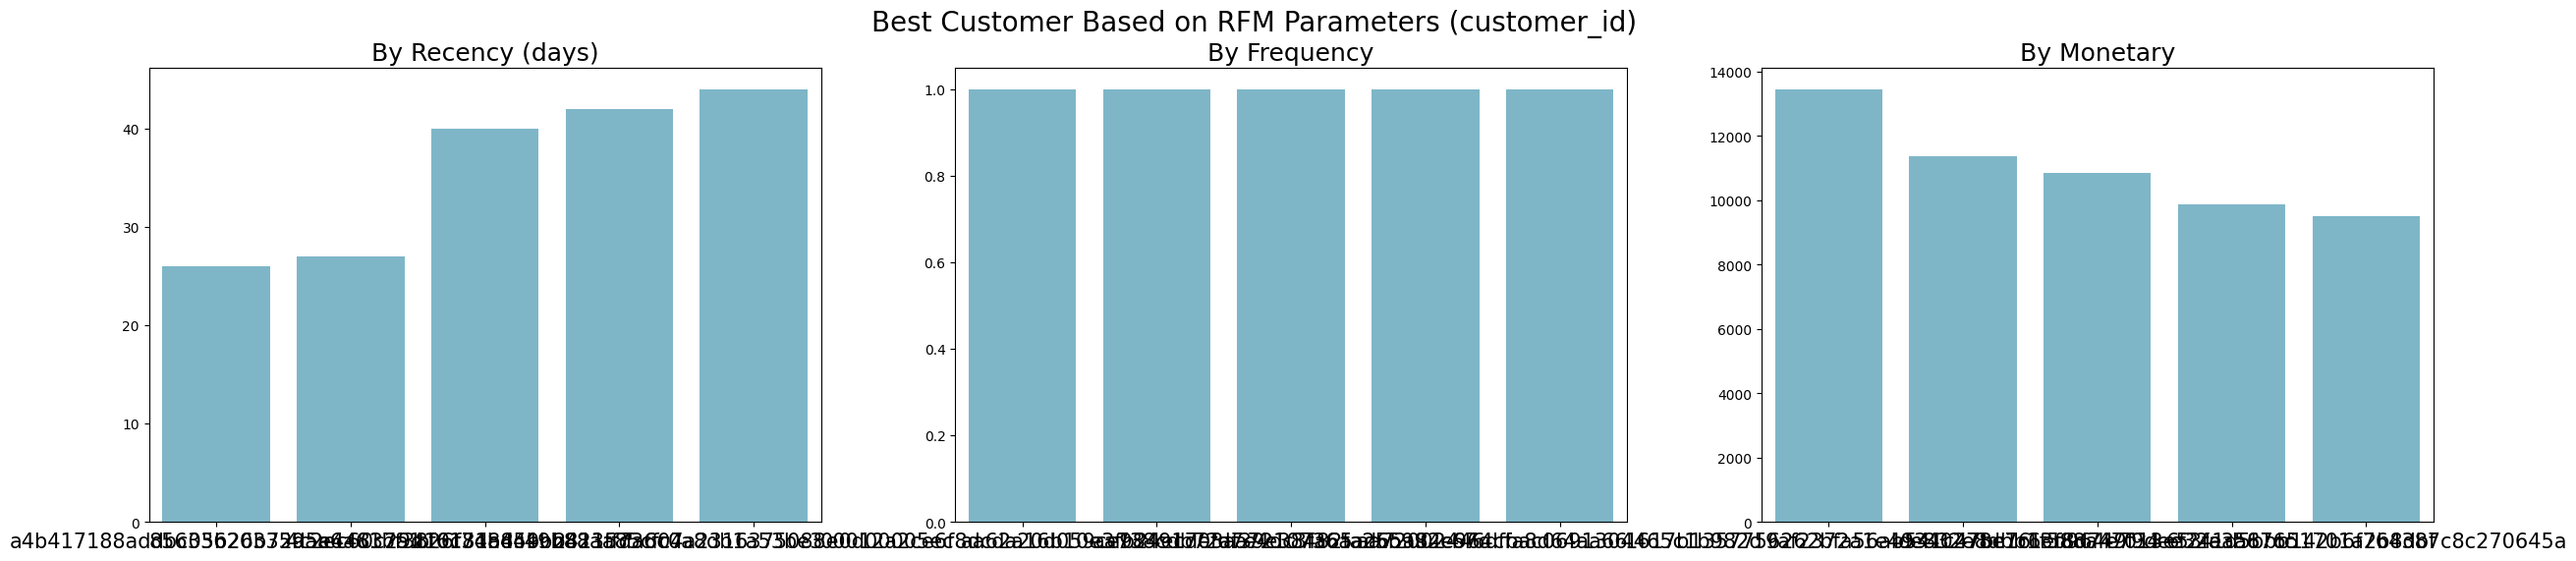

In [115]:

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

#### Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [116]:

rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,363,34364.5,49721.0,50182.5
1,000161a058600d5901f007fab4c27140,1,54.90,484,16871.5,49721.0,31252.5
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,622,2882.0,49721.0,79937.0
3,0002414f95344307404f0ace7a26f1d5,1,149.90,453,21181.5,49721.0,73341.0
4,000379cdec625522490c315e70c7a9fb,1,93.00,224,66986.5,49721.0,52578.5


In [117]:

# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,363,34.557677,100.0,50.464597
1,000161a058600d5901f007fab4c27140,1,54.90,484,16.966342,100.0,31.428184
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,622,2.898201,100.0,80.386360
3,0002414f95344307404f0ace7a26f1d5,1,149.90,453,21.300570,100.0,73.753281
4,000379cdec625522490c315e70c7a9fb,1,93.00,224,67.363060,100.0,52.874066


In [118]:

rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.10
1,000161a058600d5901f007fab4c27140,2.42
2,0001fd6190edaaf884bcaf3d49edf079,3.71
3,0002414f95344307404f0ace7a26f1d5,3.66
4,000379cdec625522490c315e70c7a9fb,3.41
5,0004164d20a9e969af783496f3408652,2.50
6,000419c5494106c306a97b5635748086,2.33


#### Segmentasi customer berdasarkan RFM_score

In [119]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.10,Medium value customer
1,000161a058600d5901f007fab4c27140,2.42,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.71,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.66,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.41,Medium value customer
5,0004164d20a9e969af783496f3408652,2.50,Low value customers
6,000419c5494106c306a97b5635748086,2.33,Low value customers
7,00046a560d407e99b969756e0b10f282,3.60,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.80,Low value customers
9,000598caf2ef4117407665ac33275130,4.95,Top customers


In [120]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,16207
1,Low value customers,41634
2,Medium value customer,34900
3,Top customers,5489
4,lost customers,1211


In [121]:

customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

C:\Users\mirza\AppData\Local\Temp\ipykernel_1180\1331284981.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


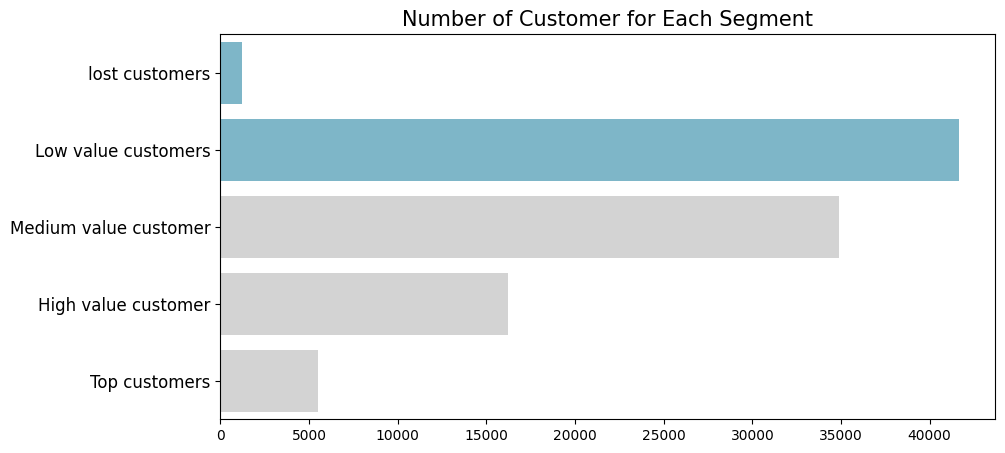

In [122]:

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()
     

## Conclusion

- Conclution pertanyaan 1 : 
Analisis menunjukkan bahwa ketiga kategori produk memiliki potensi yang baik, dengan health_beauty muncul sebagai pemimpin yang stabil. Strategi bisnis ke depan mungkin perlu fokus pada mempertahankan momentum kategori health_beauty, sementara juga berupaya menstabilkan penjualan watches_gifts dan meningkatkan performa bed_bath_table. Perhatian khusus juga perlu diberikan pada faktor musiman untuk mengoptimalkan penjualan pada periode-periode puncak.
- Conclution pertanyaan 2 : 
Analisis menunjukkan bahwa secara keseluruhan, pelanggan sangat puas dengan produk dari ketiga kategori yang dianalisis. Dominasi peringkat 5 bintang mengindikasikan bahwa sebagian besar pelanggan merasa produk yang mereka beli melebihi ekspektasi mereka. Meskipun ada sedikit variasi antar kategori, perbedaannya tidak signifikan, menunjukkan konsistensi kualitas yang baik di seluruh lini produk.
Rekomendasi bisnis berdasarkan analisis ini mungkin termasuk:
    1. Mempertahankan dan meningkatkan standar kualitas yang sudah tinggi di semua kategori.
    2. Menganalisis lebih lanjut faktor-faktor yang membuat cds_dvds_musicals unggul untuk diterapkan pada kategori lain.
    3. Fokus pada peningkatan kualitas dan kepuasan pelanggan untuk books_general_interest untuk menyamai atau melampaui kategori lainnya.
    4. Menggunakan tingginya tingkat kepuasan sebagai poin penjualan dalam strategi pemasaran.
    5. Melakukan analisis lebih mendalam terhadap ulasan bintang 1-3 untuk mengidentifikasi area perbaikan potensial.
- Conclution pertanyaan 3 :
Analisis menunjukkan bahwa distribusi geografis pelanggan sangat tidak merata, dengan konsentrasi yang sangat tinggi di SP. Perilaku pembelian bervariasi antar wilayah, dengan bed_bath_table menjadi kategori favorit di banyak negara bagian, terutama di SP yang merupakan pasar terbesar.
Rekomendasi berdasarkan analisis ini:
    1. Optimalisasi rantai pasokan dan logistik di SP untuk memenuhi permintaan yang tinggi, terutama untuk kategori bed_bath_table.
    2. Pengembangan strategi ekspansi pasar yang ditargetkan untuk RJ dan MG, dengan fokus pada kategori produk yang populer di masing-masing wilayah.
    3. Investigasi lebih lanjut mengapa beberapa kategori kurang populer di wilayah tertentu dan pengembangan strategi untuk meningkatkan penjualan mereka.
    4. Pertimbangkan penyesuaian inventaris dan strategi pemasaran berdasarkan preferensi regional untuk memaksimalkan penjualan di setiap wilayah.
    5. Lakukan analisis lebih mendalam tentang faktor-faktor yang mempengaruhi preferensi produk di berbagai wilayah (misalnya, iklim, budaya, demografi) untuk informasi strategi produk dan pemasaran yang lebih baik.
Dengan memahami distribusi geografis dan preferensi produk regional ini, perusahaan dapat mengoptimalkan operasi, meningkatkan penetrasi pasar, dan menyesuaikan strategi pemasaran untuk memaksimalkan pertumbuhan di seluruh wilayah.

In [123]:
final_merged.to_csv("all_data.csv", index=False)

In [124]:
final_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              119143 non-null  datetime64[ns]
 5   order_delivered_carrier_date   119143 non-null  datetime64[ns]
 6   order_delivered_customer_date  119143 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   delivery_time                  119143 non-null  float64       
 9   order_item_id                  118310 non-null  float64       
 10  product_id                     118310 non-null  object        
 11  